# Part II - (Highlights from Visual Explorations of Prosper Loan Dataset)
## by (Ernest Vanderpuye)

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview

> What my presentation seeks to achieve is to give answers to three key questions. These answers are drawn from the visuals that came out of my exploratory and explanatory analysis. These are the three questions that will be duly answered in the course of the presentation.

> 1. Whether the majority of loans were issued out to applicants who own houses since a home is a good collateral on which a loan can be secured on

> 2. To establish whether a Higher Borrower rate has any form of relationship with Estimated loss on the loan and finally

> 3. Whether loans that were defaulted have any perculiar traits with respect to these two selected attributes or variables 'Borrower Rate' and 'Original Loan Amount'.


### KEY INSIGHTS

> We can tell that the loans are almost equally split between Homeowners and non homeowners. They almost share the spoils just that individuals with homes have a slight edge in terms of count but that edge is not that significant. This means that owning a property alone does not give one a undue advantage when applying for a loan since the dataset is divided between the two categories. This could mean that this is considered together with other variables or attributes of the individual rather than in isolation, because we noted when we used a boxplot that homeowners had a comparatively low Borrower Rate than applicants do not own homes.

> The next thing is that as Borrower Rate / Interest rate increases so does the Estimated amount of loss. This is expected since a growing borrower rate with a static employee stated income can cause borrowers to default since their incomes are not increasing to match the spike in Borrower rate/

> Finally We can tell that most of the loans that were defaulted were within 5,000.00 which is quite surprising. One would have excepted that the larger loan amounts which are to the extreme right of the x-axis will be in default. However a closer look at the scatterplot should tell you that althought the loan amount are small the interest / Borrower Rate on these loans are higher compared to the huge loans. This could be a reason.

> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

> This dataset contains one hundred and thirteen thousand nine hundred and thirty seven (113,937.00) loans given out to individuals and organizations. Each loan is characterized by eighty-one (81) variables, which give more details about each loan. Thus 113,937.00 rows and 81 columns. The rows representing individual observations and columns various attributes.

> This project is therefore going to explore this dataset using univariate, bivariate and multivariate visualizations to explore the various relationships that exist between these variables. The exploration and visualizations will be based around selected variables which i believe are key to help me answer my research questions. However this does not preclude that the other variables are less important.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('C:/Users/nii/Downloads/ProsperLoanDataa.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> In addition to the above we can tell that the loans are almost equally split between Homeowners and non homeowners. They almost share the spoils just that individuals with homes have a slight edge in terms of count but that edge is not that significant. This means that owning a property alone does not give one a undue advantage since the dataset is divided between the two categories. This could mean that this is considered together with other variables or attributes of the individual rather than in isolation.
This could mean that this is considered together with other variables or attributes of the individual rather than in isolation, because we noted when we used a boxplot that homeowners had a comparatively low Borrower Rate than applicants do not own homes.


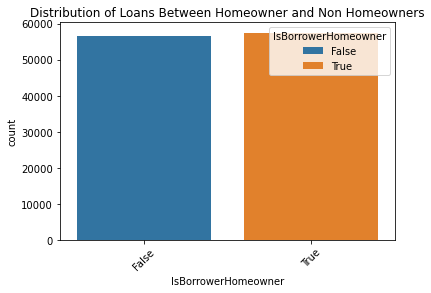

In [3]:
def QualitativeVAR_hist(variable):
    "input the variable"
    sb.countplot(data = loan_data, x = variable, hue = variable , dodge = False)
    plt.xticks(rotation = 45);
    
QualitativeVAR_hist('IsBorrowerHomeowner');
plt.title('Distribution of Loans Between Homeowner and Non Homeowners');

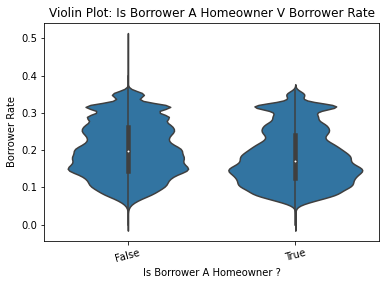

In [4]:
base_colour = sb.color_palette()[0]

def viol_p(x_variable, y_variable):
    """Please input the x and y variables"""
    sb.violinplot(data = loan_data, x = x_variable, y = y_variable, color = base_colour, inner = 'box')
    plt.xticks(rotation = 15);
    
viol_p('IsBorrowerHomeowner', 'BorrowerRate');
plt.xlabel('Is Borrower A Homeowner ?')
plt.ylabel('Borrower Rate')
plt.title('Violin Plot: Is Borrower A Homeowner V Borrower Rate');

## (Visualization 2)

> Borrower Rate' and 'Estimated loss' are positively correlated or said to have a coefficient greater than zero (0). This means that as the Borrower Rate or the interest rate that the lender charges on the loan increases the Estimated Loss on the loan amount is also going to increase. This is depicted by the upward movement from left to right. 'Estimated loss' in this context (dataset) is defined as the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.


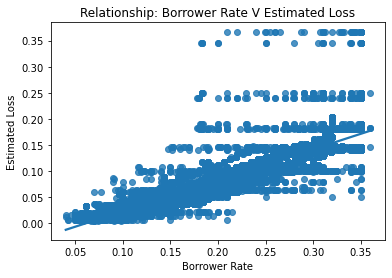

In [5]:
def Quant_scatter(x_variable, y_variable):
    "input the variable"
    sb.regplot(data = loan_data, x = x_variable, y = y_variable, fit_reg = True);
    
Quant_scatter('BorrowerRate', 'EstimatedLoss');
plt.xlabel('Borrower Rate')
plt.ylabel('Estimated Loss')
plt.title('Relationship: Borrower Rate V Estimated Loss');

## (Visualization 3)

> The scatterplot below with a little bit of shape encoding answers the final question. We can tell that most of the loans that were defaulted were within 5,000.00 which is quite surprising. One would have expected that the larger loan amounts which are to the extreme right of the x-axis will be in default. However a closer look at the scatterplot should tell you that althought the loan amount are small the interest / Borrower Rate on these loans are higher compared to the huge loans. This could be a reason.


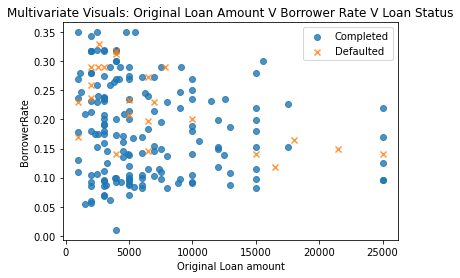

In [6]:
np.random.seed(0)
sample = np.random.choice(loan_data.shape[0], 500, replace = False)
loan_dataClean_subset = loan_data.loc[sample]

#Code - Loans that have been 'Completed' to be represented by 'o' and 'Defaulted' ones by 'x'. This is a form of Shape Encoding
LoanStatus = [['Completed', 'o'],
               ['Defaulted', 'x']]

#for LoanStatus, marker in Employers:
for LoanStat, marker in LoanStatus:
    plot_data = loan_dataClean_subset.loc[loan_dataClean_subset['LoanStatus'] == LoanStat]
    sb.regplot(data = plot_data, x = 'LoanOriginalAmount' , y = 'BorrowerRate', x_jitter = 0.04, fit_reg = False, marker = marker);
    plt.xlabel('Original Loan amount')
    plt.ylabel('BorrowerRate')
    plt.title('Multivariate Visuals: Original Loan Amount V Borrower Rate V Loan Status')
    plt.legend(['Completed', 'Defaulted'])

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [7]:
!jupyter nbconvert <Part_II_slide_deck_template 21.08.22>.ipynb --to slides --post serve --no-input --no-prompt

The system cannot find the file specified.


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 